# COMP9444 Neural Networks and Deep Learning Project
## Insect Pest Specifies Identification
Liran Fang	z5400642, Zhikai Lai	​z​5412820, Zihang Cheng	z5502944, Yitong Li	z5504073, Jinghan Wang	z5286124

## Introduction


Insect pest classification plays a pivotal role in agriculture, pest control, and ecological research. Accurate and timely identification of insect pests is crucial for effective pest management, early detection of invasive species, and maintaining crop quality. However, manual classification of insect pests is often slow, error-prone, and challenging, particularly in wild environments.

The project we selected adopted IP102 data set, which means that the data set comprehensively includes the field pests and the situations caused by pests in a larger dimension and coverage. This also presents a challenge to our use of this dataset. It is very challenging to try to optimize based on existing models and papers. Since the entire dataset has 102 categories, more than 75,000 images. Therefore, we have adopted multiple solutions with different models, trying to find the most suitable solution by optimizing the data acquisition method and adjusting different models and parameters.

This project enhances pest identification through the Resnet50 model MSA-Resnet model and integrated feature extraction and classification methods (including swin-t, vae,and svm) to improve the efficiency and accuracy of pest management practices.

Here, special thanks to our great team members for their excellent work and the guidance of the professors and tutors, which enabled us to complete the implementation of various ideas based on the paper




## Motivation


 Modern agriculture has helped humanity achieve huge food harvests and sustainable development.However it also faces more challenges.
 
 The motivation behind this project stems from the need to automate the identification of insect pests using advanced algorithms. This automation aims to achieve high accuracy and robustness in various conditions, thereby facilitating real-time monitoring and efficient pest control. Effective pest management and agricultural productivity rely heavily on accurate pest identification, which is critical for decision-making processes in pest control strategies.



## Problem Statement



The IP102 dataset presents significant challenges due to its substantial data imbalance, with certain pest categories being underrepresented. This imbalance can lead to biased models that underperform on minority classes.

The primary objective of this project is to address these challenges by implementing targeted data augmentation techniques to enhance model performance and robustness. Additionally, the project will utilize the IP102 dataset, optimize the solution for data imbalance, and train the models to achieve rapid deployment and application.

By automating insect pest identification with advanced machine learning models, the project seeks to overcome the limitations of manual classification and improve the efficiency of pest control practices.


##  Data analysis


###  Data Sources
The primary data source for this project is the IP102 dataset, which contains a total of 75,222 images categorized into 102 different pest classes. The dataset is structured hierarchically, where each pest is assigned a high-level category based on the crop it affects. This hierarchical classification system allows for a detailed understanding of pest-crop relationships.

|   | classID | Image count |
|---|---------|-------------|
| 0 | 101     | 5740        |
| 1 | 67      | 5310        |
| 2 | 70      | 5081        |
| 3 | 24      | 4094        |
| 4 | 51      | 1897        |
|...| ...     | ...         |
|97 | 98      | 93          |
|98 | 63      | 84          |
|99 | 61      | 79          |
|100| 80      | 74          |                                                                    
|101| 72      | 71          |                                                                    
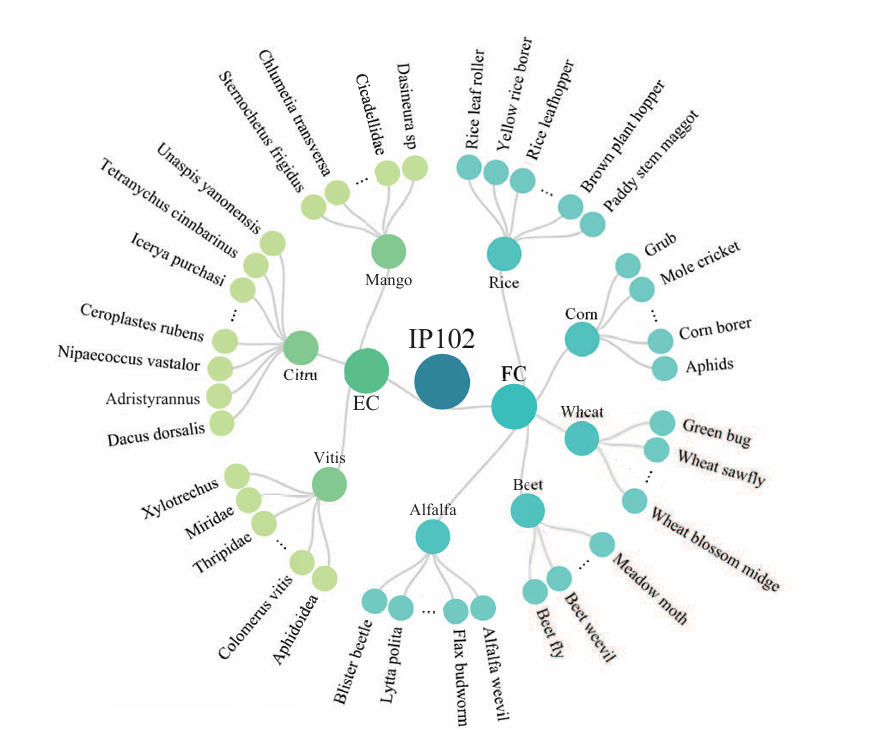


###  Data Splits
The dataset is divided into three subsets with a ratio of 6:3:1 for training, testing, and validation, respectively:

Training Set: 45,095 images
Testing Set: 22,619 images
Validation Set: 7,508 images


| Super-Class | Class | Train  | Val  | Test  | IR  |
|-------------|-------|--------|------|-------|-----|
| **FC**      |       |        |      |       |     |
| Rice        | 14    | 5,043  | 843  | 2,531 | 6.4 |
| Corn        | 13    | 8,404  | 1,399| 4,212 | 27.9|
| Wheat       | 9     | 2,048  | 340  | 1,030 | 5.2 |
| Beet        | 8     | 2,649  | 441  | 1,330 | 15.4|
| Alfalfa     | 13    | 6,230  | 1,037| 3,123 | 10.3|
| **EC**      |       |        |      |       |     |
| Vitis       | 16    | 10,525 | 1,752| 5,274 | 74.8|
| Citrus      | 19    | 4,356  | 725  | 2,192 | 17.6|
| Mango       | 10    | 5,840  | 971  | 2,927 | 61.7|
| **IP102**   |       |        |      |       |     |
| FC          | 57    | 24,602 | 4,098| 12,341| 39.4|
| EC          | 45    | 20,721 | 3,448| 10,393| 80.8|
| IP102       | 102   | 45,095 | 7,508| 22,619| 80.8|

Table 1. Training/validation/testing (denoted as Train/Val/Test) set split and imbalance ratio (IR) of the IP102 dataset on different class levels. The 'Class' indicates the sub-class number of the corresponding super-class. The 'FC' and 'EC' denote the field and economic crops, respectively.

### Histogram of data distribution

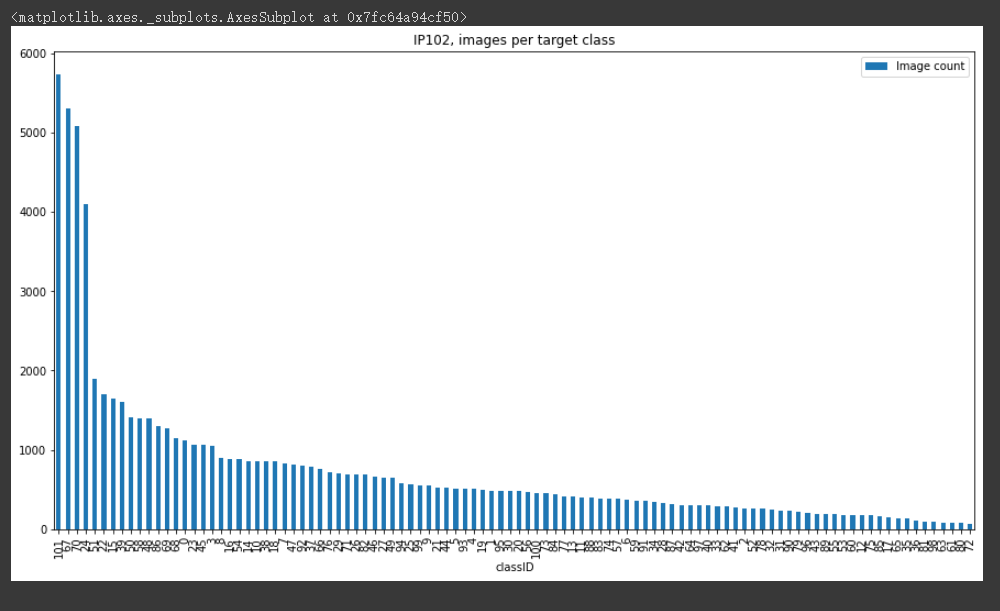

##  Exploratory Analysis of Data or RL Tasks

###  Data Properties and Challenges

The IP102 dataset exhibits a significant imbalance, with some pest classes being underrepresented. This imbalance poses a risk of overfitting and can lead to biased models that fail to accurately classify minority classes. Additionally, the dataset contains instances of mislabeled images and ultra-low-resolution images, further complicating the classification task.

### Before we move to preprocess part, let's look at the problems in the data set

#### **Problems with IP102**

Same images in different category

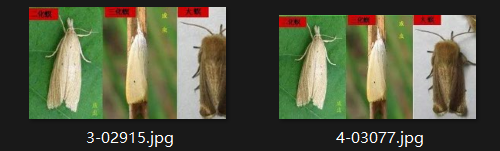

IP074* and IP075* are actually images of the same class Panonchus citri McGregor (Citrus red spider), but IP074* is listed as Papilio xuthus (citrus papilio).
The IP074* label is incorrect.

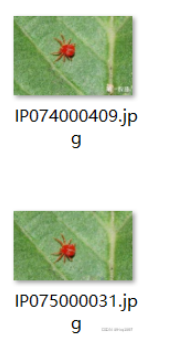

### Some of the sources of the images, which we looked up, found that they were from news reports that simply showed experts working in the fields

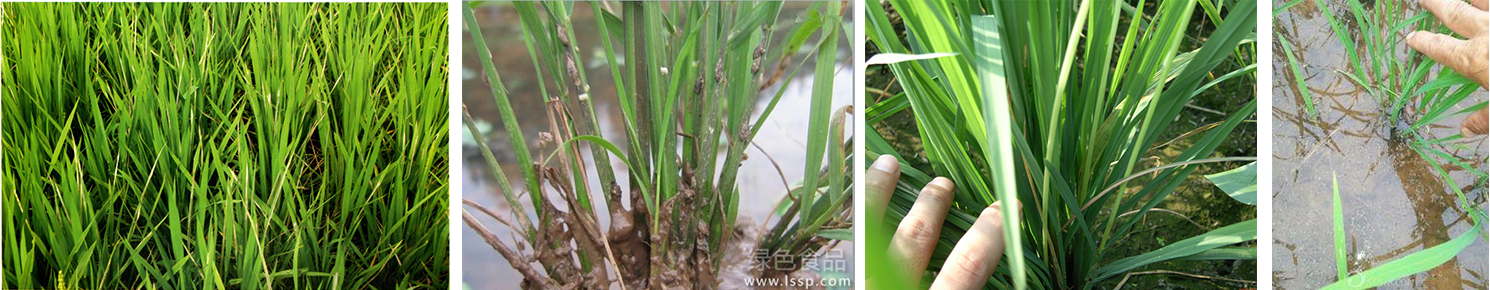

### Images with chaotic eigenvalues
In the aphid classification, after we grabbed the features, we found that this was more biased towards the classification of ants

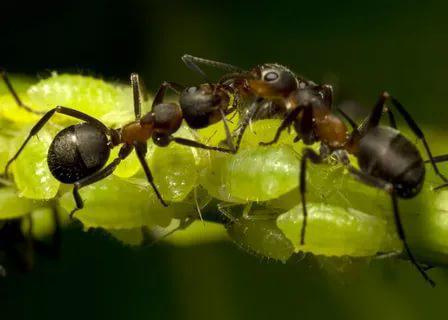

Ultra-low pixel pic -->> 1kb

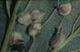

Due to the chaotic nature of the data, there is a risk of overfitting and confusion in feature values, leading to a decrease in training accuracy. Therefore, we need to perform data cleaning.

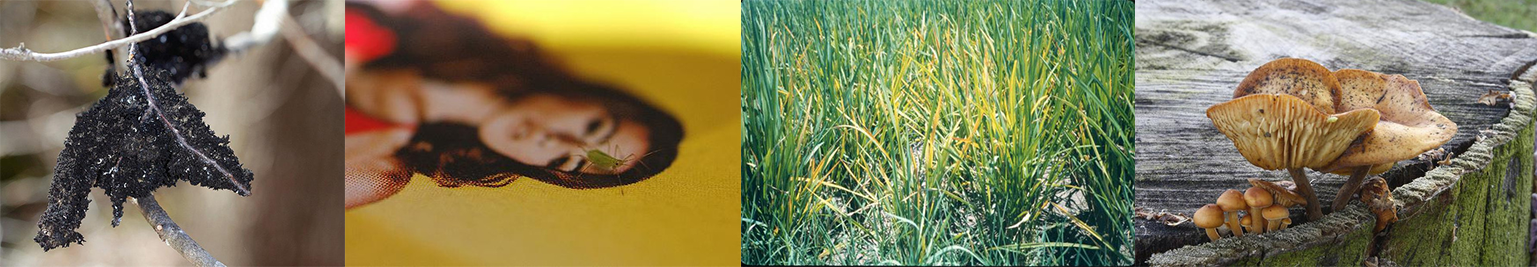

Additionally, since the overall distribution of the IP102 dataset is uneven, with some categories having particularly few samples, we provide extra augmentation for these categories to compensate for the imbalance.

This part is used and implemented in the model of our team members according to their own needs


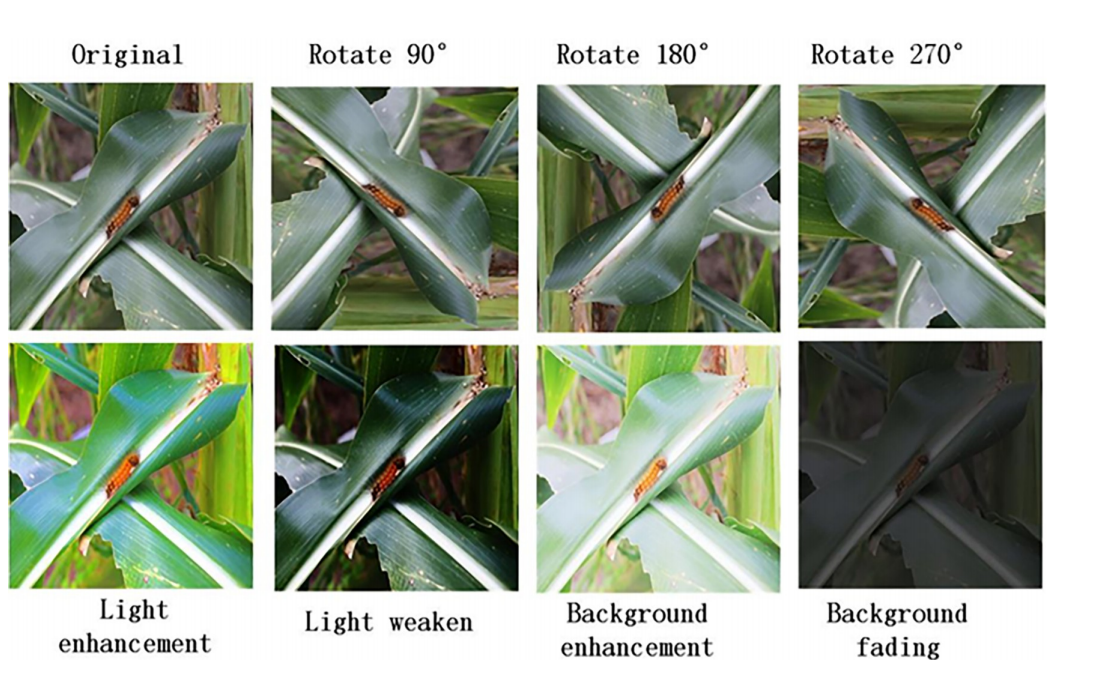


###  Pre-processing and Data Cleaning
To address these challenges, comprehensive data cleaning and pre-processing steps were undertaken. This included:

Identification and Correction of Mislabeled Data: Incorrectly labeled images, such as those in the IP074* and IP075* categories, were identified and corrected.

### 2 rules
Removal of Duplicate and Low-Resolution Images: Images with ultra-low resolution or repeated within the same category were combined or removed to improve data quality.
Data Augmentation: Underrepresented categories were subjected to targeted data augmentation techniques to balance the dataset and enhance model performance.
###  Aim of the Project
The aim of the project is to automate insect pest identification using advanced machine learning algorithms, thereby improving the accuracy and efficiency of pest control measures. By addressing the challenges of data imbalance and mislabeling, the project seeks to develop robust models capable of real-time pest monitoring and identification.

### Importance and Applications
Accurate insect pest classification is vital for agriculture and pest control. It enables early detection of invasive species, effective pest management, and ensures crop quality. The proposed solution has applications in various fields, including agriculture, environmental monitoring, and ecological research.

### Contribution
This project contributes to the field by introducing advanced data cleaning techniques and targeted data augmentation strategies to improve the accuracy and robustness of pest identification models. By leveraging these techniques, the project aims to develop models that perform well across diverse conditions, thereby enhancing the overall effectiveness of pest control practices.

In [ ]:
#preprocess

In [ ]:
import os
import shutil
import hashlib

# Print the current working directory
print("Current working directory:", os.getcwd())

# List files in the current directory
print("Files in the current directory:", os.listdir())

# load files
train_file = 'train.txt'
val_file = 'val.txt'
test_file = 'test.txt'
images_folder = 'images'
remove_folder = 'remove'

# Check if the files exist
if not os.path.exists(train_file):
    raise FileNotFoundError(f"{train_file} not found in the current directory.")
if not os.path.exists(val_file):
    raise FileNotFoundError(f"{val_file} not found in the current directory.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} not found in the current directory.")
if not os.path.exists(images_folder):
    raise FileNotFoundError(f"{images_folder} folder not found in the current directory.")

# remove folder
if not os.path.exists(remove_folder):
    os.makedirs(remove_folder)

def process_file(file_path):
    # load file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # handle pics
    image_data = [line.strip().split() for line in lines]
    image_dict = {img[0]: img[1] for img in image_data}

    # cal hash and find duplicate
    hash_dict = {}
    for image_name in image_dict.keys():
        image_path = os.path.join(images_folder, image_name)
        if os.path.isfile(image_path):
            with open(image_path, 'rb') as img_file:
                img_hash = hashlib.md5(img_file.read()).hexdigest()
            if img_hash in hash_dict:
                hash_dict[img_hash].append(image_name)
            else:
                hash_dict[img_hash] = [image_name]

    # remove duplicates pics to remove folder
    for hash_value, images in hash_dict.items():
        if len(images) > 1:
            for image_name in images[1:]:
                shutil.move(os.path.join(images_folder, image_name), os.path.join(remove_folder, image_name))
                del image_dict[image_name]

    # remake file
    with open(file_path, 'w') as file:
        for image_name, category in image_dict.items():
            file.write(f'{image_name} {category}\n')

    print(f"{file_path} processed done.")

# handle train
process_file(train_file)

# handle val
process_file(val_file)

# handle test
process_file(test_file)


In [ ]:
import os
import shutil
import hashlib
from PIL import Image
import imagehash
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed

# Define folder paths
images_folder = 'images'
remove_folder = 'remove'

# Create the remove folder if it doesn't exist
if not os.path.exists(remove_folder):
    os.makedirs(remove_folder)

# Set the threshold for the file size to consider as low feature value (in bytes)
size_threshold = 3 * 1024  # 5KB

# Threshold for determining if a single color dominates more than 95%
color_threshold = 0.90

# Threshold for determining if an image is too green
green_threshold = 240

# Read all files in the images folder
image_files = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]

# Function to calculate perceptual hash
def calculate_hash(image_path):
    with Image.open(image_path) as img:
        img_hash = imagehash.phash(img)
    return img_hash

# Function to check if an image is dominated by a single color
def is_single_color_dominant(image_path, color_threshold):
    try:
        image = Image.open(image_path)
        image = image.convert('RGB')
        np_image = np.array(image)
        total_pixels = np_image.shape[0] * np_image.shape[1]

        for i in range(3):  # Check for each color channel: Red, Green, Blue
            if np.sum(np_image[:, :, i] == np_image[:, :, i].max()) / total_pixels > color_threshold:
                return True
        return False
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return False

# Function to check if an image is too green
def is_too_green(image_path, green_threshold):
    try:
        image = Image.open(image_path)
        image = image.convert('RGB')
        np_image = np.array(image)
        avg_green = np.mean(np_image[:, :, 1])  # Mean of green channel
        return avg_green > green_threshold
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return False

# Initialize counters
total_processed = 0
duplicates_moved = 0
low_feature_moved = 0
single_color_moved = 0
too_green_moved = 0

# Calculate hashes and find duplicates using ThreadPoolExecutor
hash_dict = {}
print("Calculating perceptual hashes and finding duplicates...")
with ThreadPoolExecutor() as executor:
    futures = {executor.submit(calculate_hash, os.path.join(images_folder, image_name)): image_name for image_name in image_files}
    for future in as_completed(futures):
        image_name = futures[future]
        try:
            img_hash = future.result()
            if img_hash in hash_dict:
                hash_dict[img_hash].append(image_name)
            else:
                hash_dict[img_hash] = [image_name]
        except Exception as e:
            print(f"Error processing image {image_name}: {e}")

# Move duplicate images to the remove folder
print("Moving duplicate images to the remove folder...")
for hash_value, images in hash_dict.items():
    if len(images) > 1:
        print(f"Duplicates found for hash {hash_value}: {images[1:]}")
        for image_name in images[1:]:
            shutil.move(os.path.join(images_folder, image_name), os.path.join(remove_folder, image_name))
            duplicates_moved += 1
            print(f"Moved {image_name} to remove folder")

# Move images with low feature values, single color dominance, or too green to the remove folder
print("Checking and moving images with low feature values, single color dominance, or too green to the remove folder...")
with ThreadPoolExecutor() as executor:
    futures = {}
    for image_name in image_files:
        image_path = os.path.join(images_folder, image_name)
        if os.path.isfile(image_path):
            file_size = os.path.getsize(image_path)
            if file_size < size_threshold:
                shutil.move(image_path, os.path.join(remove_folder, image_name))
                low_feature_moved += 1
                print(f"Image {image_name} moved to remove folder due to low feature value ")
            else:
                futures[executor.submit(is_single_color_dominant, image_path, color_threshold)] = (image_name, 'single_color')
                futures[executor.submit(is_too_green, image_path, green_threshold)] = (image_name, 'too_green')

    for future in as_completed(futures):
        image_name, check_type = futures[future]
        try:
            if future.result():
                shutil.move(os.path.join(images_folder, image_name), os.path.join(remove_folder, image_name))
                if check_type == 'single_color':
                    single_color_moved += 1
                    print(f"Image {image_name} moved to remove folder due to single color dominance")
                elif check_type == 'too_green':
                    too_green_moved += 1
                    print(f"Image {image_name} moved to remove folder due to being too green")
        except Exception as e:
            print(f"Error processing image {image_name}: {e}")

# Calculate total processed files
total_processed = len(image_files)
total_moved = duplicates_moved + low_feature_moved + single_color_moved + too_green_moved

print(f"Total images processed: {total_processed}")
print(f"Total images moved to remove folder: {total_moved}")
print(f" - Duplicates: {duplicates_moved}")
print(f" - Low feature value: {low_feature_moved}")
print(f" - Single color dominance: {single_color_moved}")
print(f" - Too green: {too_green_moved}")
print("All duplicate images, images with low feature values, single color dominant images, and too green images have been removed and moved to the 'remove' folder.")

## Model

### Resnet50 GoogleNet Vgg16 AlexNet

Based on the characteristics of our database, which include a large number of insect species to be identified, an imbalance in the number of images among these species, and the overall large size of the database, we utilized four common Convolutional Neural Network models to be pre-trained.


- AlexNet: A simpler architecture with 8 layers which contain stacked convolutional layers followed by fully connected layers. It is more suitable for small to medium-scale datasets. 


- GoogLeNet: Inception modules perform convolutions with multiple kernel sizes in parallel. It is more suitable for moderate-scale datasets.


- Vgg16: Deep network with 16 layers, using 3x3 convolutions throughout. It is more suitable for some grained classification tasks, and for some huge and imbalanced datasets, it has tendency to overfitting.


- ResNet50: Deep residual network with 50 layers. It is more suitable for complex and large-scale datasets.

### Design main idea
In pre-trained model design function, set the Dropout to an input variable in the function which can be adjusted according to the needs of
different models and experiments to optimize the performance of the model and prevent overfitting. 

In main function, add Weight Decay and set a proper learning rate to smoother the process and reduce the probablity of overfitting.
When the leaning rate is set to 0.001, all four models performs badly with significant overfitting, so we lowered
it to 0.0001 to get the optimal version.


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets, models
import torch.nn as nn
import torch.optim as optim
from datasets import load_dataset
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Check if there is an available GPU or CPU to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Load datasets
ds = load_dataset("EnmmmmOvO/inspect_filter_dataset")

# Data standardization processing
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Transform Hugging Face dataset to PyTorch DataLoader
def transform_examples(batch):
    images = [Image.fromarray(np.array(image)).convert("RGB") for image in batch['image']]
    images = [data_transforms(image) for image in images]
    labels = batch['label']
    return {'image': images, 'label': labels}

# Transform the training set, validation set, and test set
ds.set_transform(transform_examples)

train_loader = DataLoader(ds['train'], batch_size=32, shuffle=True,num_workers=4,pin_memory=True)
val_loader = DataLoader(ds['valid'], batch_size=32, shuffle=True,num_workers=4,pin_memory=True)
test_loader = DataLoader(ds['test'], batch_size=32, shuffle=True,num_workers=4,pin_memory=True)

dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}
dataset_sizes = {'train': len(ds['train']), 'val': len(ds['valid']), 'test': len(ds['test'])}

# Define, design and load the pre-trained model
def create_model(model_name, num_classes,dropout):
    if model_name == 'alexnet':
        model = models.alexnet(pretrained=True)
        num_ftrs = model.classifier[6].in_features
        model.classifier[6] = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(num_ftrs, num_classes)
        )
    elif model_name == 'googlenet':
        model = models.googlenet(pretrained=True)
        num_ftrs = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(num_ftrs, num_classes)
        )
    elif model_name == 'vgg':
        model = models.vgg16(pretrained=True)
        num_ftrs = model.classifier[6].in_features
        model.classifier[6] = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(num_ftrs, num_classes)
        )
    elif model_name == 'resnet':
        model = models.resnet50(pretrained=True)
        num_ftrs = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(num_ftrs, num_classes)
        )
    model = model.to(device)
    return model

# Define loss functions and optimizers
criterion = nn.CrossEntropyLoss()

# Define training model function
def train_model(model, criterion, optimizer, num_epochs=25):
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for batch in dataloaders[phase]:
                inputs = batch['image'].to(device)
                labels = batch['label'].to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc.item())
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc.item())

    return model, train_loss_history, val_loss_history, train_acc_history, val_acc_history

# Define evaluate model function
def evaluate_model(model, test_loader):
    model.eval()
    running_corrects = 0

    for batch in test_loader:
        inputs = batch['image'].to(device)
        labels = batch['label'].to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        running_corrects += torch.sum(preds == labels.data)

    acc = running_corrects.double() / len(test_loader.dataset)
    print(f'Test Acc: {acc:.4f}')

# Main function
def main(model_name,dropout=0.5):
    print(f'Training {model_name} with dropout {dropout}...')
    # Create and train models
    model = create_model(model_name, num_classes=102,dropout=dropout)

    optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=5e-4)

    model, train_loss, val_loss, train_acc, val_acc = train_model(model, criterion, optimizer, num_epochs=25)
    evaluate_model(model, test_loader)

    # Draw loss and accuracy curves for training and validation
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

#### **Resnet**

Set dropout to 0.6

Training resnet with dropout 0.6...


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 155MB/s] 


Epoch 0/24
----------
train Loss: 3.7628 Acc: 0.1981
val Loss: 3.2037 Acc: 0.3073
Epoch 1/24
----------
train Loss: 3.0097 Acc: 0.3450
val Loss: 2.7105 Acc: 0.4109
Epoch 2/24
----------
train Loss: 2.6010 Acc: 0.4237
val Loss: 2.3936 Acc: 0.4741
Epoch 3/24
----------
train Loss: 2.3106 Acc: 0.4835
val Loss: 2.1670 Acc: 0.5199
Epoch 4/24
----------
train Loss: 2.0756 Acc: 0.5284
val Loss: 1.9807 Acc: 0.5465
Epoch 5/24
----------
train Loss: 1.8823 Acc: 0.5612
val Loss: 1.8266 Acc: 0.5676
Epoch 6/24
----------
train Loss: 1.7278 Acc: 0.5913
val Loss: 1.7055 Acc: 0.5852
Epoch 7/24
----------
train Loss: 1.5890 Acc: 0.6155
val Loss: 1.6121 Acc: 0.6065
Epoch 8/24
----------
train Loss: 1.4769 Acc: 0.6385
val Loss: 1.5262 Acc: 0.6172
Epoch 9/24
----------
train Loss: 1.3736 Acc: 0.6565
val Loss: 1.4675 Acc: 0.6342
Epoch 10/24
----------
train Loss: 1.2872 Acc: 0.6756
val Loss: 1.4073 Acc: 0.6476
Epoch 11/24
----------
train Loss: 1.2069 Acc: 0.6941
val Loss: 1.3600 Acc: 0.6552
Epoch 12/24
--

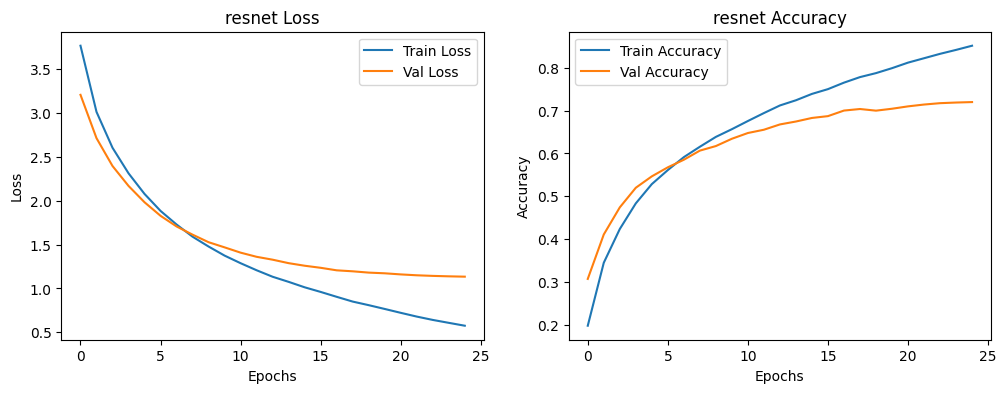

In [ ]:
main('resnet',dropout=0.6)

Training googlenet with dropout 0.5...


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 154MB/s] 


Epoch 0/24
----------
train Loss: 4.1252 Acc: 0.1322
val Loss: 3.8025 Acc: 0.1896
Epoch 1/24
----------
train Loss: 3.6778 Acc: 0.2130
val Loss: 3.4942 Acc: 0.2498
Epoch 2/24
----------
train Loss: 3.4101 Acc: 0.2685
val Loss: 3.2577 Acc: 0.2971
Epoch 3/24
----------
train Loss: 3.1969 Acc: 0.3075
val Loss: 3.0508 Acc: 0.3426
Epoch 4/24
----------
train Loss: 3.0215 Acc: 0.3410
val Loss: 2.9063 Acc: 0.3743
Epoch 5/24
----------
train Loss: 2.8710 Acc: 0.3697
val Loss: 2.7791 Acc: 0.3890
Epoch 6/24
----------
train Loss: 2.7493 Acc: 0.3883
val Loss: 2.6753 Acc: 0.4099
Epoch 7/24
----------
train Loss: 2.6371 Acc: 0.4101
val Loss: 2.5857 Acc: 0.4307
Epoch 8/24
----------
train Loss: 2.5420 Acc: 0.4295
val Loss: 2.4944 Acc: 0.4450
Epoch 9/24
----------
train Loss: 2.4489 Acc: 0.4485
val Loss: 2.4082 Acc: 0.4644
Epoch 10/24
----------
train Loss: 2.3662 Acc: 0.4644
val Loss: 2.3484 Acc: 0.4737
Epoch 11/24
----------
train Loss: 2.2846 Acc: 0.4817
val Loss: 2.2738 Acc: 0.4846
Epoch 12/24
--

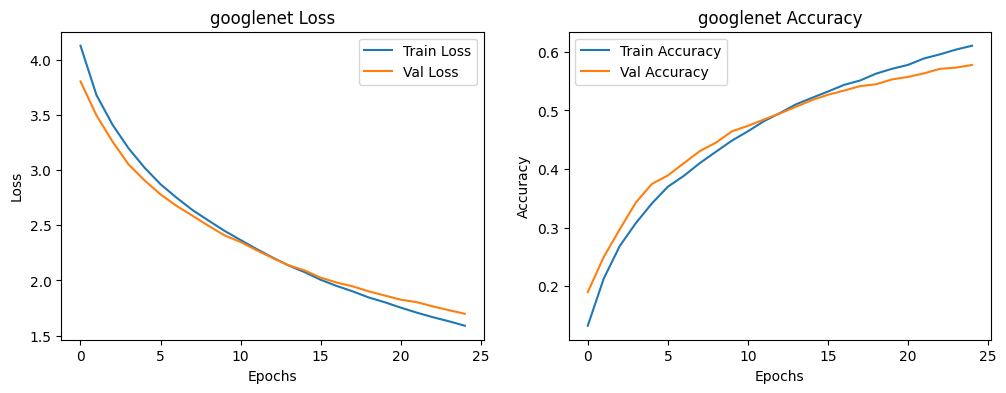

In [ ]:
main('googlenet',dropout=0.5)

Training vgg with dropout 0.5...


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 166MB/s]  


Epoch 0/24
----------
train Loss: 3.3544 Acc: 0.2748
val Loss: 2.4316 Acc: 0.4507
Epoch 1/24
----------
train Loss: 2.3372 Acc: 0.4485
val Loss: 1.9333 Acc: 0.5354
Epoch 2/24
----------
train Loss: 1.9393 Acc: 0.5230
val Loss: 1.7057 Acc: 0.5861
Epoch 3/24
----------
train Loss: 1.6849 Acc: 0.5719
val Loss: 1.5787 Acc: 0.5991
Epoch 4/24
----------
train Loss: 1.5153 Acc: 0.6079
val Loss: 1.4933 Acc: 0.6225
Epoch 5/24
----------
train Loss: 1.3894 Acc: 0.6333
val Loss: 1.4245 Acc: 0.6342
Epoch 6/24
----------
train Loss: 1.2839 Acc: 0.6602
val Loss: 1.3747 Acc: 0.6501
Epoch 7/24
----------
train Loss: 1.2005 Acc: 0.6777
val Loss: 1.3358 Acc: 0.6561
Epoch 8/24
----------
train Loss: 1.1102 Acc: 0.6922
val Loss: 1.2990 Acc: 0.6708
Epoch 9/24
----------
train Loss: 1.0417 Acc: 0.7092
val Loss: 1.2743 Acc: 0.6744
Epoch 10/24
----------
train Loss: 0.9832 Acc: 0.7243
val Loss: 1.2377 Acc: 0.6818
Epoch 11/24
----------
train Loss: 0.9127 Acc: 0.7401
val Loss: 1.2365 Acc: 0.6863
Epoch 12/24
--

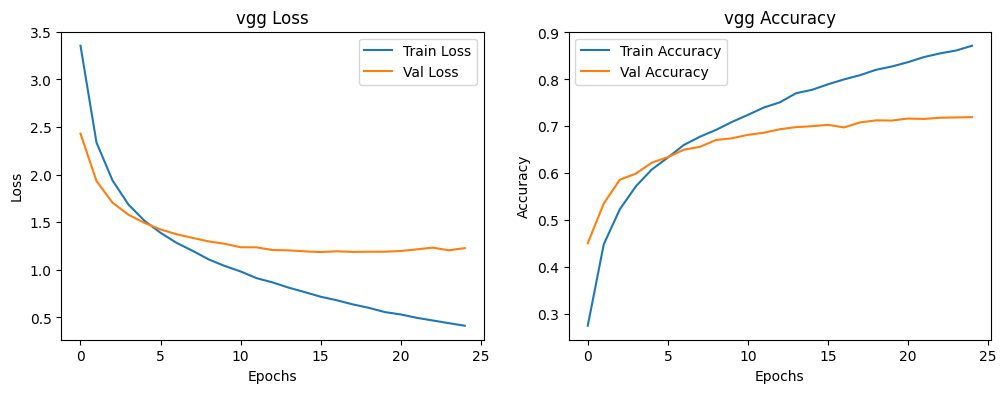

In [ ]:
main('vgg',dropout=0.5)

# Result
Finally, we get the best performance in different models with different Dropout Rate:
AlexNet : 0.7; GoogLeNet: 0.5; VGG16: 0.5; ResNet: 0.6

According to the learing curves of each model, we can find that the test accuracy of ResNet and Vgg16 have reached 72%, while ResNet have tendency to perform better in the furture training. And what's more, Vgg16 is not appropriate for this huge and imbalanced datasets and easy to overfit after more epoch training. Therefore, ResNet50 stands out from four modles. 

### Multi-Scale Attention ResNet

#### **Introduction**
We refer to the previous pre-trained model, resnet, as well as the literature:

[3]. W. Linfeng, L. Yong, L. Jiayao, W. Yunsheng, and X. Shipu, “Based on the multi-scale information sharing network
of fine-grained attention for agricultural pest detection”, PLOS ONE 18(10):e0286732.

In this paper, Multi-Scale Input is referenced. Each Scale Input is cropped to focus on a specific region of the image, and then local features are extracted via Attention Pyramid Network (APN). For APN, I set up ChannelAttention and SpatialAttention to enhance the important regions in the Feature map, and Feature Fusion to combine multi-scale features together. Finally, the accuracy of the model and the speed of the model are guaranteed.

In [ ]:
from datasets import load_dataset
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

# Load the insect pest dataset from Hugging Face
ds = load_dataset("EnmmmmOvO/inspect_filter_dataset")

class InsectPestDataset(Dataset):
    """
    Custom dataset class to convert Hugging Face dataset to PyTorch dataset.
    """
    def __init__(self, hf_dataset, transform=None):
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        """
        Get a sample from the dataset.
        Args:
            idx: Index of the sample
        Returns:
            image: Transformed image
            label: Image label
        """
        item = self.dataset[idx]
        image = item['image'].convert('RGB')
        label = item['label']

        if self.transform:
            image = self.transform(image)

        return image, label

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Load insect pest dataset
dataset = load_dataset("EnmmmmOvO/inspect_filter_dataset")

# Create training, validation, and test datasets
train_dataset = InsectPestDataset(dataset['train'], transform=transform)
val_dataset = InsectPestDataset(dataset['valid'], transform=transform)
test_dataset = InsectPestDataset(dataset['test'], transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Training data loader
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)  # Validation data loader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Test data loader


####  **Design ideas**
I loaded the pest image dataset from Hugging Face and then transformed Hugging Face's dataset into a PyTorch usable dataset. And use torchvision.transforms to define a series of image transformations, including resizing, converting to tensors and normalizing images, and creating data loaders such as train_loader, val_loader, test_loader, and so on. The quantities are grouped in a 6:2:2 ratio.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

In [ ]:
import torch
import warning
warnings.filterwarnings("ignore")
import torch.nn as nn
from torchvision import models
import time

# Load pretrained ResNet34 model
base_model = models.resnet34(pretrained=True)

# Multi-scale feature extractor module
class MultiScaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(MultiScaleFeatureExtractor, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels, out_channels, kernel_size=5, padding=2)
        self.relu = nn.ReLU()

    def forward(self, x):
        out1 = self.relu(self.conv1(x))
        out2 = self.relu(self.conv3(x))
        out3 = self.relu(self.conv5(x))
        return out1 + out2 + out3

# Channel and spatial attention module
class ChannelSpatialAttention(nn.Module):
    def __init__(self, in_channels, ratio=16):
        super(ChannelSpatialAttention, self).__init__()
        self.channel_attention = ChannelAttention(in_channels, ratio)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        x = self.channel_attention(x) * x
        x = self.spatial_attention(x) * x
        return x

# Channel attention submodule
class ChannelAttention(nn.Module):
    def __init__(self, in_channels, ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // ratio, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_channels // ratio, in_channels, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)

# Spatial attention submodule
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        assert kernel_size in (3, 7), 'kernel size must be 3 or 7'
        padding = 3 if kernel_size == 7 else 1
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv(x)
        return self.sigmoid(x)

# Custom model including multi-scale feature extraction and channel-spatial attention modules
class CustomResNet34(nn.Module):
    def __init__(self, base_model, num_classes):
        super(CustomResNet34, self).__init__()
        self.base_model = base_model
        self.multi_scale = MultiScaleFeatureExtractor(in_channels=512, out_channels=512)
        self.channel_spatial_attention = ChannelSpatialAttention(in_channels=512)
        self.fc = nn.Sequential(
            nn.Linear(base_model.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.base_model.conv1(x)
        x = self.base_model.bn1(x)
        x = self.base_model.relu(x)
        x = self.base_model.maxpool(x)

        x = self.base_model.layer1(x)
        x = self.base_model.layer2(x)
        x = self.base_model.layer3(x)
        x = self.base_model.layer4(x)

        # Apply multi-scale feature extraction and channel-spatial attention modules
        x = self.multi_scale(x)
        x = self.channel_spatial_attention(x)

        x = self.base_model.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Instantiate custom model
num_classes = 102
custom_model = CustomResNet34(base_model, num_classes)

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
custom_model = custom_model.to(device)

# Define loss function and SGD optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, custom_model.parameters()),
                            lr=0.001,  # Initial learning rate
                            momentum=0.9,  # Momentum
                            weight_decay=1e-4)  # L2 regularization

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training and validation function with early stopping
def train_and_validate(model, loss_criterion, optimizer, scheduler, epochs=20, patience=5):
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    best_loss = float('inf')
    best_epoch = None
    patience_counter = 0

    for epoch in range(epochs):
        print(f'Epoch {epoch+1}/{epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0
            total = 0

            for inputs, labels in dataloader:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = loss_criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total += labels.size(0)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / total

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            # Record best validation loss
            if phase == 'val' and epoch_loss < best_loss:
                best_loss = epoch_loss
                best_epoch = epoch
                torch.save(model.state_dict(), 'best_model.pt')
                patience_counter = 0  # Reset patience counter
            elif phase == 'val':
                patience_counter += 1

        # Update learning rate
        scheduler.step()

        if patience_counter >= patience:
            print(f"Early stopping triggered. Best epoch: {best_epoch+1}")
            break

    return model, history, best_epoch

# Train the model
num_epochs = 30
trained_model, history, best_epoch = train_and_validate(custom_model, criterion, optimizer, scheduler, num_epochs)

# Save training history
torch.save(history, 'insect_data_history_resnet34_sgd.pt')

Epoch 1/30
----------
train Loss: 2.9591 Acc: 0.3381
val Loss: 1.9225 Acc: 0.5273
Epoch 2/30
----------
train Loss: 1.6243 Acc: 0.5772
val Loss: 1.4710 Acc: 0.6176
Epoch 3/30
----------
train Loss: 1.1724 Acc: 0.6781
val Loss: 1.3225 Acc: 0.6529
Epoch 4/30
----------
train Loss: 0.8834 Acc: 0.7442
val Loss: 1.2653 Acc: 0.6716
Epoch 5/30
----------
train Loss: 0.7082 Acc: 0.7876
val Loss: 1.3131 Acc: 0.6701
Epoch 6/30
----------
train Loss: 0.5494 Acc: 0.8305
val Loss: 1.3906 Acc: 0.6712
Epoch 7/30
----------
train Loss: 0.4481 Acc: 0.8614
val Loss: 1.4374 Acc: 0.6867
Epoch 8/30
----------
train Loss: 0.2520 Acc: 0.9232
val Loss: 1.2602 Acc: 0.7321
Epoch 9/30
----------
train Loss: 0.1841 Acc: 0.9452
val Loss: 1.3074 Acc: 0.7372
Epoch 10/30
----------
train Loss: 0.1533 Acc: 0.9520
val Loss: 1.3334 Acc: 0.7351
Epoch 11/30
----------
train Loss: 0.1394 Acc: 0.9588
val Loss: 1.3789 Acc: 0.7380
Epoch 12/30
----------
train Loss: 0.1136 Acc: 0.9676
val Loss: 1.4107 Acc: 0.7391
Epoch 13/30
-

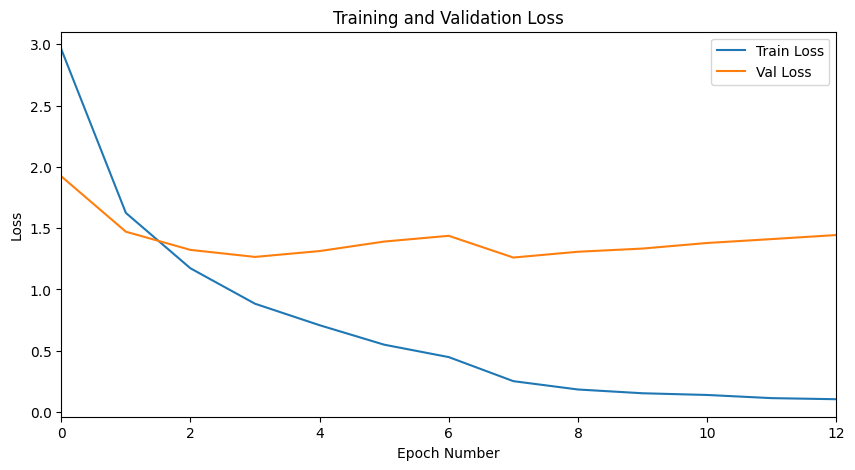

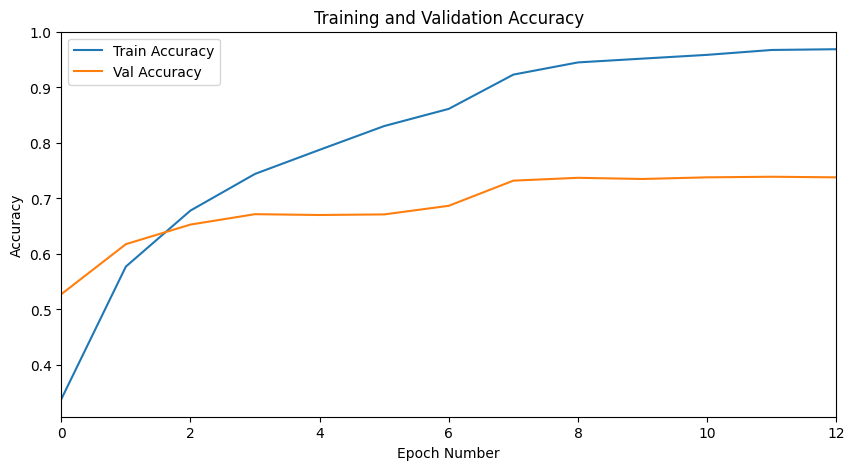

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.figure(figsize=(10, 5))
plt.plot(history_dict['train_loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xlim(0, len(history_dict['train_loss']) - 1)
plt.savefig('loss_curve_dict.png')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_dict['train_acc'], label='Train Accuracy')
plt.plot(history_dict['val_acc'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlim(0, len(history_dict['train_acc']) - 1)
plt.savefig('accuracy_curve_dict.png')
plt.show()


In [ ]:
def test_model(model, test_loader, loss_criterion):
    # Load the saved best model weights
    model.load_state_dict(torch.load('best_model.pt'))
    model.to(device)

    # Set the model to evaluation mode
    model.eval()

    test_loss = 0.0
    correct = 0
    total = 0

    # Disable gradient computation
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = loss_criterion(outputs, labels)

            # Accumulate the test loss
            test_loss += loss.item() * inputs.size(0)
            # Get the predicted class
            _, predicted = torch.max(outputs, 1)
            # Update the total number of labels
            total += labels.size(0)
            # Update the number of correct predictions
            correct += (predicted == labels).sum().item()

    # Calculate the average test loss
    avg_test_loss = test_loss / len(test_loader.dataset)
    # Calculate the test accuracy
    test_acc = correct / total

    print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_acc*100:.2f}%')

    return avg_test_loss, test_acc

# Test the model
test_loss, test_acc = test_model(custom_model, test_loader, criterion)

Test Loss: 1.2637, Test Accuracy: 72.52%


####  **Analysis of results**
From the above results, we can see that the accuracy of the model in the test set reaches 72.52%. The performance of the model is OK, which means that the model learned most of the features and predicted the outcome reasonably well.

In [ ]:
with open('classes.txt', 'r') as file:
    class_names = [line.strip() for line in file]

C:\Users\赖智凯\AppData\Local\Temp\ipykernel_18392\528641699.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  custom_model.load_state_dict(torch.load('best_model.pt'))


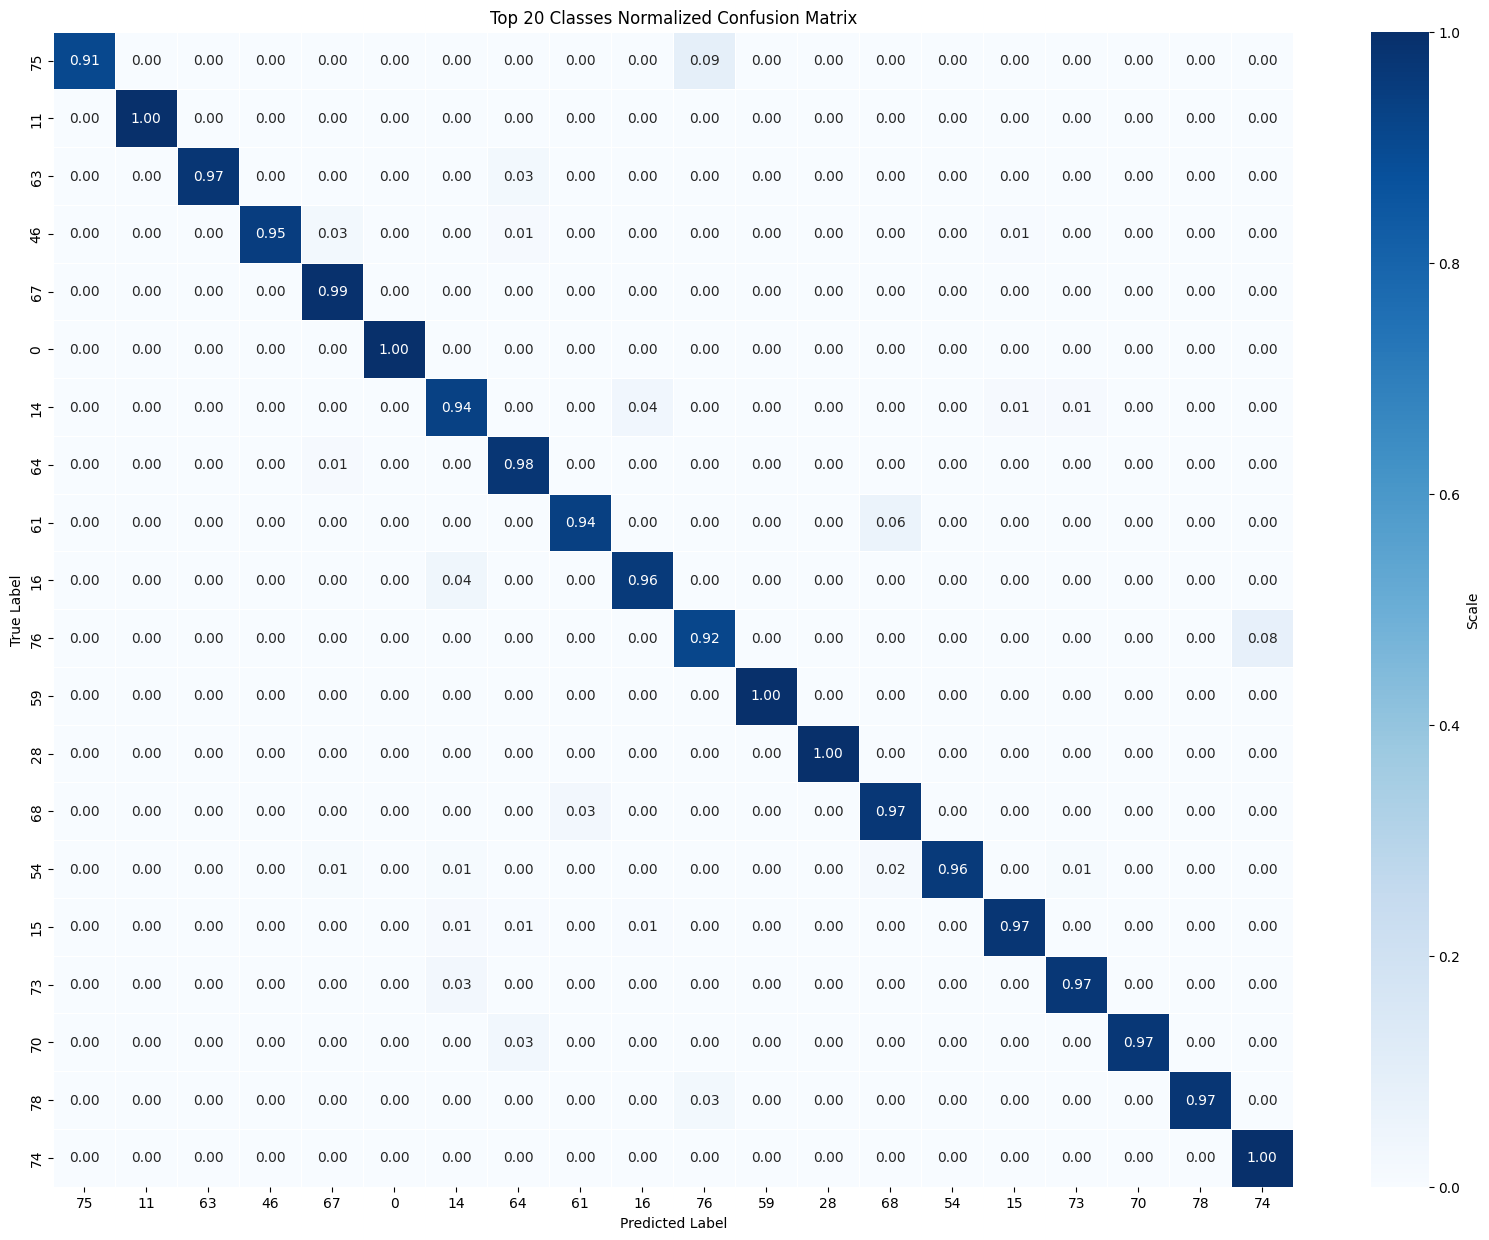

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Load the best model weights
custom_model.load_state_dict(torch.load('best_model.pt'))
custom_model.to(device)
custom_model.eval()

# Get all predictions and true labels
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = custom_model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Get the diagonal elements, i.e., the number of correct classifications per class
accuracies = np.diag(cm) / cm.sum(axis=1)

# Find the top 20 classes with the highest accuracy
top_indices = np.argsort(accuracies)[-20:]

# Extract the confusion matrix for the top 20 classes
cm_top20 = cm[top_indices, :][:, top_indices]

# Normalize the confusion matrix
cm_top20_normalized = cm_top20.astype('float') / cm_top20.sum(axis=1)[:, np.newaxis]

# Get class names
class_names = [str(i) for i in top_indices]

# Create a DataFrame for the normalized confusion matrix
df_cm = pd.DataFrame(cm_top20_normalized, index=class_names, columns=class_names)

# Set the plot size
plt.figure(figsize=(20, 15))

# Plot the heatmap
sns.heatmap(df_cm, annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Scale'}, linewidths=0.5)

# Set labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Top 20 Classes Normalized Confusion Matrix')
plt.show()


####  **Analysis of results**
Finally, we want to use a heatmap to show which classes predict best. Their breed counterpart are

Top 20 most accurate insect species:

76  Phyllocoptes oleiverus ashmead

12 rice leafhopper

64 Polyphagotars onemus latus

47 alfalfa plant bug

68 Lycorma delicatula

1  rice leaf roller

15 grub

65 Pseudococcus comstocki Kuwana

62 Brevipoalpus lewisi McGregor

17 wireworm

77  Icerya purchasi Maskell

60 Viteus vitifoliae

29 green bug

69  Xylotrechus

55 Thrips

16 mole cricket

74  Papilio xuthus

71  Miridae

79  Ceroplastes rubens

75  Panonchus citri McGregor

### Swin Transformer

Swin Transformer is an efficient vision Transformer model for computer vision tasks. It was introduced by Microsoft Research Asia in 2021 to address the challenges of applying Transformers to the visual domain.
Key innovations of Swin Transformer include:

Hierarchical design: Progressively merging image patches to form a hierarchical structure similar to convolutional neural networks.
Shifted window mechanism: Moving attention windows between different layers to enhance cross-window information exchange.
Relative position encoding: Adopting relative position bias to improve the model's positional awareness.

These design choices enable Swin Transformer to process visual elements at various scales while maintaining linear computational complexity with respect to image size. Swin Transformer has achieved excellent performance on multiple vision tasks, including image classification, object detection, and semantic segmentation.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
import numpy as np
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from datasets import load_dataset

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### **Load Data**
We define two image transformation pipelines: one with augmentation for training data, and another standard pipeline for validation/test data.

This pipeline includes resizing, random horizontal flipping, random rotation, random cropping, conversion to tensor, and normalization.

In [ ]:
class InsectPestDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item['image'].convert('RGB')
        label = item['label']

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_normal = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
dataset = load_dataset("EnmmmmOvO/inspect_filter_dataset")

train_dataset = InsectPestDataset(dataset['train'], transform=transform)
val_dataset = InsectPestDataset(dataset['valid'], transform=transform_normal)
test_dataset = InsectPestDataset(dataset['test'], transform=transform_normal)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

#### **Set the Pre-trained model**

In [ ]:
from transformers import AutoFeatureExtractor, SwinForImageClassification

model_name = "microsoft/swin-base-patch4-window7-224"
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
model = SwinForImageClassification.from_pretrained(model_name, num_labels=102, ignore_mismatched_sizes=True).to(device)

#### **Train and Valid**

#### **Optimizer**
We use the AdamW optimizer, which is an improved version of Adam that decouples weight decay from the gradient updates

#### **Learning Rate Scheduler**
We employ a ReduceLROnPlateau scheduler, which reduces the learning rate when a metric has stopped improving:

#### **Loss Function**
We use Cross Entropy Loss, which is suitable for multi-class classification problems.



In [ ]:
import torch.optim as optim
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau

torch.cuda.empty_cache()

optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
criterion = torch.nn.CrossEntropyLoss()

train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    for batch_idx, (data, target) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')):
        data, target = data.to(device), target.to(device)

        inputs = feature_extractor(images=[transforms.ToPILImage()(img) for img in data], return_tensors="pt").pixel_values.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += (outputs.logits.argmax(dim=1) == target).sum().item()
        total_samples += target.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for data, target in tqdm(val_loader, desc='Validating'):
            data, target = data.to(device), target.to(device)

            inputs = feature_extractor(images=[transforms.ToPILImage()(img) for img in data], return_tensors="pt").pixel_values.to(device)

            outputs = model(inputs)
            loss = criterion(outputs.logits, target)

            total_loss += loss.item()
            total_correct += (outputs.logits.argmax(dim=1) == target).sum().item()
            total_samples += target.size(0)


    avg_valid_loss = total_loss / len(val_loader)
    valid_accuracy = total_correct / total_samples
    valid_losses.append(avg_valid_loss)
    valid_accuracies.append(valid_accuracy)

    torch.save(model.state_dict(), f'/content/drive/MyDrive/model1_epoch_{epoch + 1}.pth')

    print(f'Epoch [{epoch+1}/{num_epochs}], Valid Loss: {avg_valid_loss:.4f}, Valid Accuracy: {valid_accuracy:.4f}')
    scheduler.step(avg_valid_loss)

Epoch 1/15: 100%|██████████| 384/384 [11:25<00:00,  1.78s/it]
Epoch [1/15], Train Loss: 1.9944, Train Accuracy: 0.5015
Validating: 100%|██████████| 74/74 [01:10<00:00,  1.06it/s]
Epoch [1/15], Valid Loss: 1.3997, Valid Accuracy: 0.6186
Epoch 2/15: 100%|██████████| 384/384 [11:30<00:00,  1.80s/it]
Epoch [2/15], Train Loss: 1.1325, Train Accuracy: 0.6809
Validating: 100%|██████████| 74/74 [01:10<00:00,  1.05it/s]
Epoch [2/15], Valid Loss: 1.2124, Valid Accuracy: 0.6697
Epoch 3/15: 100%|██████████| 384/384 [11:28<00:00,  1.79s/it]
Epoch [3/15], Train Loss: 0.8237, Train Accuracy: 0.7594
Validating: 100%|██████████| 74/74 [01:10<00:00,  1.05it/s]
Epoch [3/15], Valid Loss: 1.1555, Valid Accuracy: 0.6908
Epoch 4/15: 100%|██████████| 384/384 [11:29<00:00,  1.79s/it]
Epoch [4/15], Train Loss: 0.5943, Train Accuracy: 0.8212
Validating: 100%|██████████| 74/74 [01:10<00:00,  1.04it/s]
Epoch [4/15], Valid Loss: 1.1438, Valid Accuracy: 0.7070
Epoch 5/15: 100%|██████████| 384/384 [11:29<00:00,  1.80

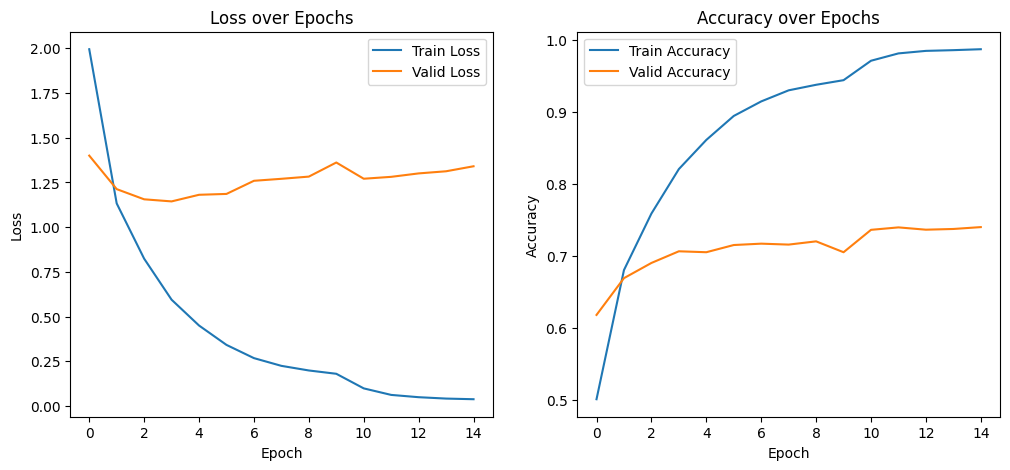

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

#### **Load the best epoch model**


In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/model1_epoch_12.pth'))

all_preds = []
all_labels = []

model.eval()
total_correct = 0
total_samples = 0
with torch.no_grad():
    for data, target in tqdm(test_loader):
        data, target = data.to(device), target.to(device)
        inputs = feature_extractor(images=[transforms.ToPILImage()(img) for img in data], return_tensors="pt").pixel_values.to(device)

        outputs = model(inputs)
        preds = outputs.logits.argmax(dim=1).cpu().numpy()
        labels = target.cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(labels)

100%|██████████| 133/133 [02:01<00:00,  1.09it/s]


#### **Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1:.4f}')

Test Accuracy: 0.7445
Test Precision: 0.7706
Test Recall: 0.7445
Test F1 Score: 0.7460
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####  **Analysis of results**

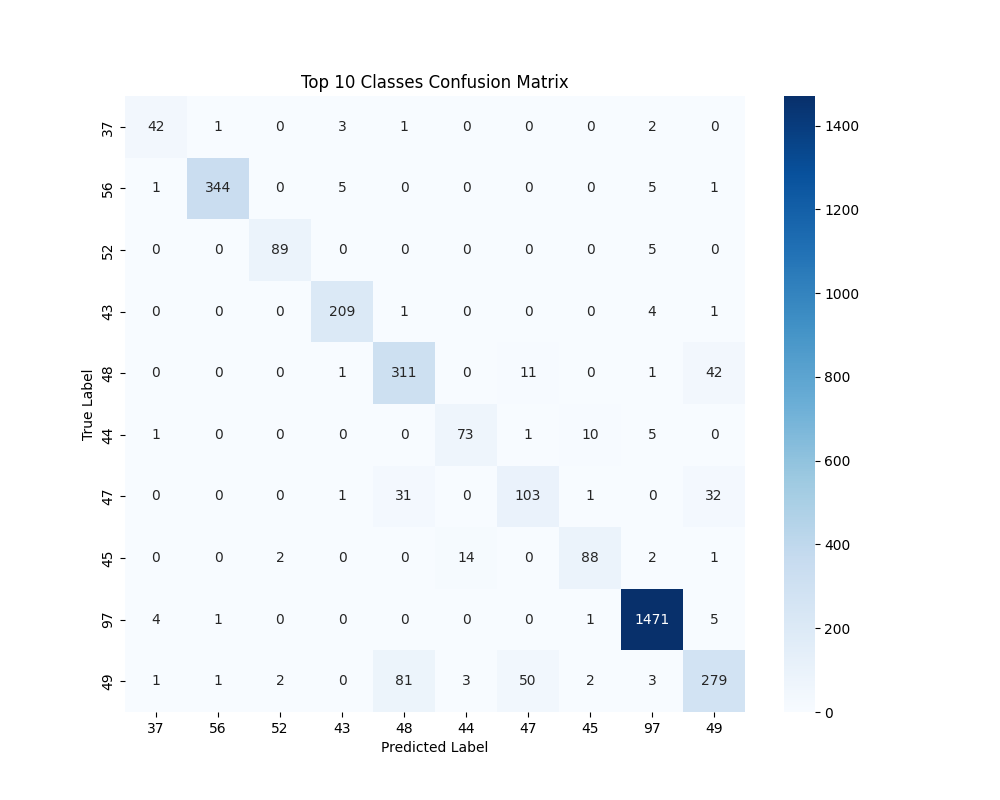

From the above results, we can see that the accuracy of the model in the test set reaches 74.45%. The performance of the model is OK, which means that the model learned most of the features and predicted the outcome reasonably well.

Reason of Swin Transformers (Swin-T) Perform Well
1.	Hierarchical Feature Learning:

	Swin-T constructs hierarchical feature maps, capturing both local and global features effectively. This hierarchical structure enables the model to understand complex patterns and details in images.

2.	Shifted Window Mechanism:

	The innovative shifted window approach allows Swin-T to model cross-window interactions efficiently. By dividing the image into non-overlapping windows and shifting them at each layer, the model captures long-range dependencies and enhances contextual understanding.
3.	Scalability and Efficiency:

	Swin-T scales effectively with input image size and model depth, processing high-resolution images by breaking them into manageable patches. This design ensures efficient computation and better performance on large and complex datasets.

### VAE

Variational Autoencoders (VAEs) are generative models that combine deep learning and probabilistic inference.

Key features of VAEs:

- Structure: Consists of an encoder and a decoder. The encoder compresses input into a latent space representation, while the decoder reconstructs the input from this representation.

- Latent Space: VAEs encode inputs as probability distributions in latent space, not fixed points.

- Training Objective: Includes reconstruction loss and KL divergence, balancing reconstruction accuracy and latent space structure.

- Generative Capability: Can generate new data by sampling from the latent space and decoding.

- Applications: Image generation, anomaly detection, data compression, and more.

In this step, we concatenate the lists of encoded data and labels into single NumPy arrays. This prepares the data for subsequent processing, such as training a classifier.

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision.models as models
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
import numpy as np
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from datasets import load_dataset
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### **Load Data**
We don't use normalization in this VAE model is because of the design of the my VAE model. It uses a Sigmoid activation function, which outputs in the range [0, 1], and `transforms.ToTensor()` already scales the pixel values from [0, 255] to the range [0, 1]. to [0, 1]. Thus, the ranges of the input and output data already match without additional normalization. In addition, the loss function uses binary cross-entropy, which works well for values in the range [0, 1]. Keeping the data in the [0, 1] range also facilitates visualization and interpretation of the reconstructed image.

The input size from 224x224 to 128x128, as 128x128 is usually sufficient to capture the main features and structure of an image for VAE tasks.


In [ ]:
class InsectPestDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item['image'].convert('RGB')
        label = item['label']

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

dataset = load_dataset("EnmmmmOvO/inspect_filter_dataset")

train_dataset = InsectPestDataset(dataset['train'], transform=transform)
val_dataset = InsectPestDataset(dataset['valid'], transform=transform)
test_dataset = InsectPestDataset(dataset['test'], transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

#### **Set the model**

Constructor
- Initializes the encoder and decoder networks.

- The encoder network consists of convolutional layers followed by fully connected layers, which output the mean (mu) and log-variance (logvar) of the latent space.

- The decoder network consists of fully connected layers followed by transposed convolutional layers to reconstruct the input.

Encoder
- Encodes the input image x into the latent space, producing mu and logvar.

Reparameterization:
- Uses mu and logvar to sample a latent vector z using the reparameterization trick.

Decoding:
- Decodes the latent vector z back to the reconstructed image.

Forward pass:
- Combines the encoding, reparameterization, and decoding steps.

Loss function:
- Computes the reconstruction loss (binary cross-entropy) and the Kullback-Leibler divergence loss.

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau


class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(256, 512, 4, 2, 1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(512*4*4, 1024),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(1024, latent_dim)
        self.fc_logvar = nn.Linear(1024, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512*4*4),
            nn.ReLU(),
            nn.Unflatten(1, (512, 4, 4)),
            nn.ConvTranspose2d(512, 256, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, 2, 1),
            nn.Sigmoid(),
        )


    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

    def loss_function(self, recon_x, x, mu, logvar):
        BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return BCE + KLD


#### **Train the VAE model**
Set the Model
- An instance of the VAE class is created with a latent dimension of 20.

Set the Optimizer
- The Adam optimizer is used with a learning rate of 1e-4 and weight decay of 1e-5.

Scheduler:
- The learning rate scheduler reduces the learning rate by a factor of 0.5 if the validation loss does not improve for 5 epochs.


In [ ]:
latent_dim = 20
vae = VAE(latent_dim)
vae.to(device)

optimizer = torch.optim.Adam(vae.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=5)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    vae.train()
    train_loss = 0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for batch_idx, (data, _) in enumerate(progress_bar):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        loss = vae.loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        progress_bar.set_postfix(loss=train_loss / ((batch_idx + 1) * train_loader.batch_size))

    print(f'Epoch {epoch+1}, Loss: {train_loss/len(train_loader.dataset)}')

Epoch 1/10: 100%|██████████| 384/384 [01:51<00:00,  3.44it/s, loss=3.09e+4]
Epoch 1, Loss: 30915.44102588281
Epoch 2/10: 100%|██████████| 384/384 [01:48<00:00,  3.53it/s, loss=2.83e+4]
Epoch 2, Loss: 28358.758076272225
Epoch 3/10: 100%|██████████| 384/384 [01:48<00:00,  3.53it/s, loss=2.79e+4]
Epoch 3, Loss: 27929.246627028624
Epoch 4/10: 100%|██████████| 384/384 [01:49<00:00,  3.50it/s, loss=2.77e+4]
Epoch 4, Loss: 27749.047086527484
Epoch 5/10: 100%|██████████| 384/384 [01:49<00:00,  3.50it/s, loss=2.76e+4]
Epoch 5, Loss: 27630.703586282823
Epoch 6/10: 100%|██████████| 384/384 [01:49<00:00,  3.51it/s, loss=2.75e+4]
Epoch 6, Loss: 27561.85269404461
Epoch 7/10: 100%|██████████| 384/384 [01:49<00:00,  3.50it/s, loss=2.74e+4]
Epoch 7, Loss: 27497.26869342277
Epoch 8/10: 100%|██████████| 384/384 [01:49<00:00,  3.51it/s, loss=2.74e+4]
Epoch 8, Loss: 27429.664623175257
Epoch 9/10: 100%|██████████| 384/384 [01:49<00:00,  3.50it/s, loss=2.73e+4]
Epoch 9, Loss: 27389.203793987523
Epoch 10/10: 

#### **Getting Encoder Data**

In this section, we aim to extract the latent features from the trained Variational Autoencoder (VAE). These features will then be used for subsequent classification tasks.

In [ ]:
vae.eval()
encoded_data = []
labels = []

with torch.no_grad():
    progress_bar = tqdm(train_loader, desc="Extracting features")
    for data, label in progress_bar:
        data = data.to(device)
        mu, logvar = vae.encode(data)
        z = vae.reparameterize(mu, logvar)
        encoded_data.append(z.cpu().numpy())
        labels.append(label.numpy())

Extracting features: 100%|██████████| 384/384 [01:43<00:00,  3.71it/s]


we concatenate the lists of encoded data and labels into single NumPy arrays. This is necessary to prepare the data for subsequent processing or analysis.

In [ ]:
encoded_data = np.concatenate(encoded_data)
labels = np.concatenate(labels)

#### **Train the SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
encoded_data = scaler.fit_transform(encoded_data)

svm = SVC(kernel='linear')
svm.fit(encoded_data, labels)

#### **Evaluation**

In [ ]:
encoded_data = []
labels = []

with torch.no_grad():
    progress_bar = tqdm(test_loader, desc="Extracting features")
    for data, label in progress_bar:
        data = data.to(device)
        mu, logvar = vae.encode(data)
        z = vae.reparameterize(mu, logvar)
        encoded_data.append(z.cpu().numpy())
        labels.append(label.numpy())

Extracting features: 100%|██████████| 133/133 [00:32<00:00,  4.07it/s]


In [ ]:
encoded_data = np.concatenate(encoded_data)
labels = np.concatenate(labels)

In [ ]:
y_pred = svm.predict(encoded_data)
accuracy = accuracy_score(labels, y_pred)
print('acc: ', accuracy)

acc:  0.24405478805053726


####  **Analysis of result**

The performance of our current VAE model is suboptimal, primarily due to its simplicity and the diverse nature of the dataset. The model struggles to effectively capture features because:

1.	Model Simplicity:
	The current VAE architecture might be too simple to capture the complex and varied features present in the dataset. Increasing the complexity of the model by adding more layers or filters could help in learning better representations.
2.	Dataset Complexity:
	The dataset includes a wide range of images, not just insects but also pest damage, adding to the complexity. This diversity makes it challenging for a simple VAE to capture all the necessary features accurately.
3.	Lack of Loss Reduction:
	We observe that the loss plateaus after a few epochs, indicating that the model is not learning effectively. This stagnation suggests that the current model complexity is insufficient to handle the diversity and complexity of the dataset.

Improving the model’s architecture and considering the complexity of the dataset can help in better feature extraction and overall performance.

### Multi-Model Feature Extraction Model

[4]. An J, Du Y, Hong P, Zhang L, Weng X., “Insect recognition based on complementary features frommultipleviews”,Scientific Reports. 2023 Feb;13(1):2966. DOI: 10.1038/s41598-023-29600-1. https://europepmc.org/article/pmc/pmc9940688

We also implemented a model based on multi-model feature extraction, utilizing ResNet, Virsion Transformer, and Swin transformer, extracting the final layer weights.

Then used a modified IFCNN with attention selection algorithms to combine these features, extracting the weights from the three models.

According to the attention part output weight, we will processing the original picture, The high-weight parts were retained, while the low-weight parts were directly converted to black. Which aims to focus on important part.

Finally, use SVM to classificate the processed image.


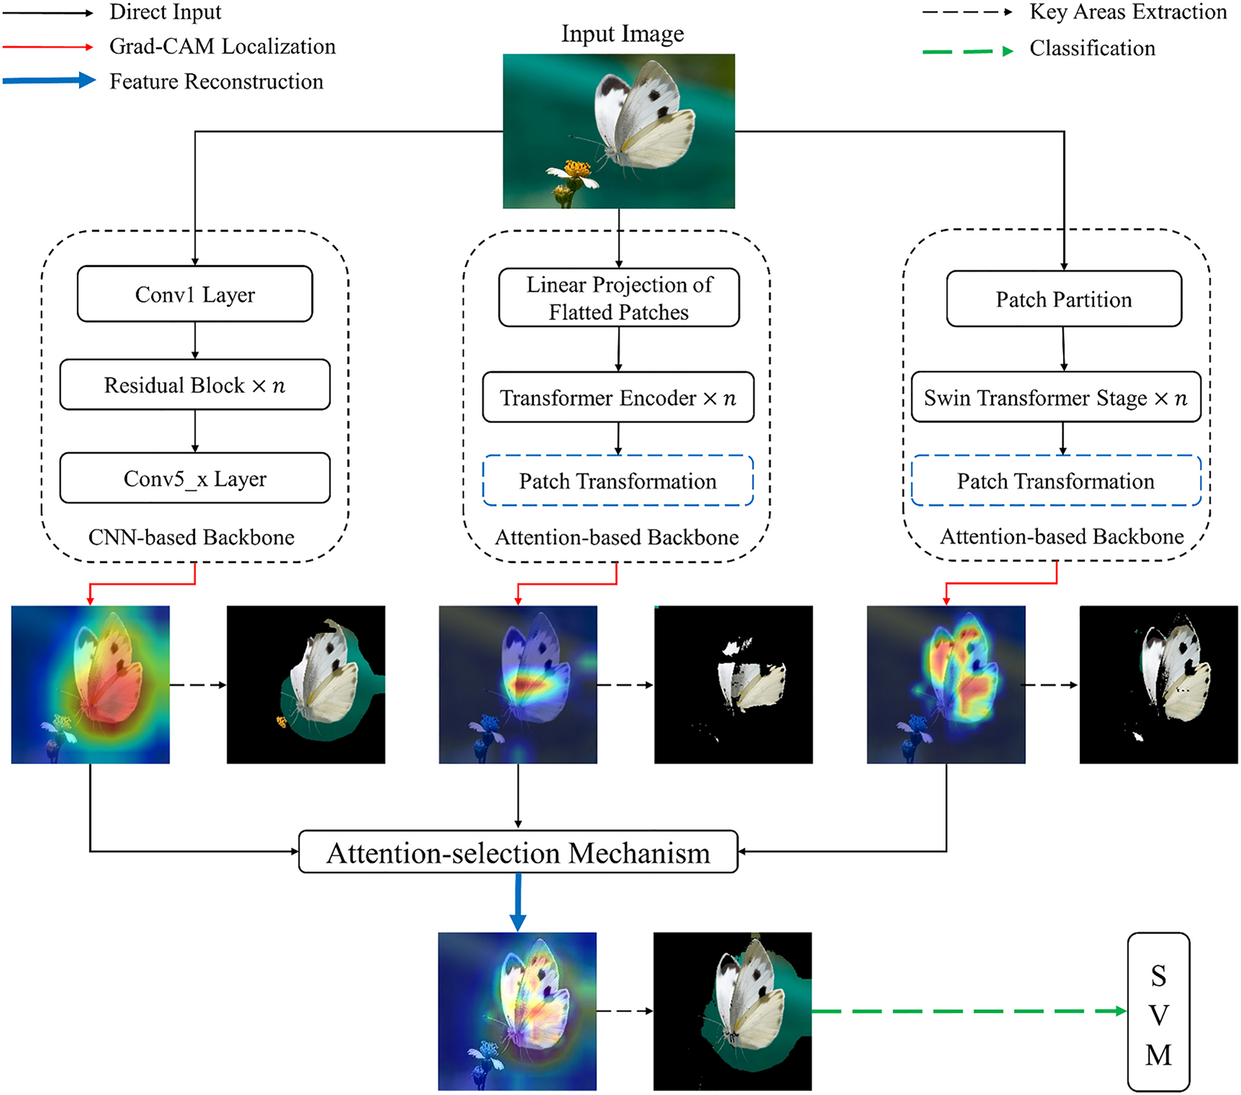

In [ ]:
import torch
import timm
import torch.nn as nn
import torchvision.models as models
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
import numpy as np
from tqdm import tqdm
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from datasets import load_dataset
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### **Load Data**

In [ ]:
class InsectPestDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item['image'].convert('RGB')
        label = item['label']

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = load_dataset("EnmmmmOvO/inspect_filter_dataset")

train_dataset = InsectPestDataset(dataset['train'], transform=transform)
val_dataset = InsectPestDataset(dataset['validation'], transform=transform)
test_dataset = InsectPestDataset(dataset['test'], transform=transform)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)
test_loader = DataLoader(test_dataset, batch_size=4)

#### **Set the first three pre-train model**



In [ ]:
resnet = models.resnet101(weights='IMAGENET1K_V1')
vit = torch.hub.load('facebookresearch/deit:main', 'deit_tiny_patch16_224', pretrained=True)
swin_t = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True)

#### **Get the final layer weights**


The ViT model outputs a sequence of token embeddings, including a special classification token ([CLS]). The transformation removes the [CLS] token and reshapes the remaining tokens into a spatial grid of size height x width. This transformation is necessary to align the output format with the expected input format for GradCAM, which works with spatial feature maps (channels first).

In [ ]:
def vit_reshape_transform(tensor, height=14, width=14):
    result = tensor[:, 1 :  , :].reshape(tensor.size(0), height, width, tensor.size(2))
    result = result.transpose(2, 3).transpose(1, 2)
    return result

The Swin Transformer processes input data in a hierarchical manner, producing outputs that can be reshaped into spatial feature maps. The transformation reshapes the tensor into a grid of size height x width and transposes the dimensions to match the expected format for GradCAM.

In [ ]:
def swin_reshape_transform(tensor, height=7, width=7):
    result = tensor.reshape(tensor.size(0), height, width, tensor.size(2))
    result = result.transpose(2, 3).transpose(1, 2)
    return result

ResNet
- The final block of the fourth layer (layer4) is chosen because it captures high-level features after multiple convolutional operations. This layer contains rich semantic information crucial for making the final prediction.

VIT
- the last normalization layer before the final classification head is chosen. This layer contains a comprehensive representation of the entire input sequence due to the self-attention mechanism that processes global context.

Swin-T
- The final normalization layer in the last block of the last stage is selected. Similar to ViT, this layer has processed hierarchical features through multiple stages, making it a rich representation of the input data.

In [ ]:
resnet.to(device)
vit.to(device)
swin_t.to(device)

grad_cam_resnet = GradCAM(model=resnet, target_layers=[resnet.layer4[-1]])
grad_cam_vit = GradCAM(model=vit, target_layers=[vit.blocks[-1].norm1], reshape_transform=vit_reshape_transform)
grad_cam_swin = GradCAM(model=swin_t, target_layers=[swin_t.layers[-1].blocks[-1].norm2], reshape_transform=swin_reshape_transform)

#### **Set IFCNN with attention algorithum**

Input the weights obtained from the three models mentioned above. Use an IF-CNN with some attention algorithms to obtain the combined results.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AttentionExtraction(nn.Module):
    def __init__(self, in_channels):
        super(AttentionExtraction, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x

class AttentionSelection(nn.Module):
    def __init__(self):
        super(AttentionSelection, self).__init__()
        pass

    def forward(self, x, threshold):
        mask = (x > threshold).float()
        selected_attention = x * mask
        return selected_attention

class AttentionRefining(nn.Module):
    def __init__(self, in_channels):
        super(AttentionRefining, self).__init__()
        self.conv3 = nn.Conv2d(in_channels, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 3, kernel_size=3, padding=1)

    def forward(self, x):
        x = F.relu(self.conv3(x))
        x = self.conv4(x)
        x = (x - x.min()) / (x.max() - x.min())
        return x

class MultiAttentionModel(nn.Module):
    def __init__(self, threshold, balance_coeff):
        super(MultiAttentionModel, self).__init__()
        self.resnet_extractor = AttentionExtraction(3)
        self.vit_extractor = AttentionExtraction(3)
        self.swint_extractor = AttentionExtraction(3)
        self.attention_selection = AttentionSelection()
        self.refiner = AttentionRefining(64)
        self.threshold = threshold
        self.balance_coeff = balance_coeff

    def forward(self, resnet_cam, vit_cam, swint_cam):
        resnet_features = self.resnet_extractor(resnet_cam)
        vit_features = self.vit_extractor(vit_cam)
        swint_features = self.swint_extractor(swint_cam)

        combined_features = resnet_features + vit_features + swint_features
        selected_attention = self.attention_selection(combined_features, self.threshold)

        refined_attention = self.refiner(selected_attention)
        return refined_attention

####  **Analysis**

We have implemented the core components of the model. However, the IF-CNN (Interpretable Fully Convolutional Neural Network) segment outputs a set of weights instead of direct classification results. These weights necessitate manual annotation, as we cannot directly utilize them for classification comparison. Consequently, our efforts have been concentrated on understanding and implementing the architecture of the IF-CNN. Due to the nature of the output and the requirement for manual annotation, we have not advanced to the stages of training and testing the model. This implementation serves as a foundational learning step, providing us with valuable insights into the functionality and integration of IF-CNN within our broader model framework.

#### **Predictions**

1. Comprehensive Feature Extraction:

  By using Swin-T, ViT, and ResNet, we capture features from multiple angles and levels of abstraction. This comprehensive feature extraction is likely to be more effective than relying on a single model.
2. Enhanced Robustness:

	Combining the strengths of different models makes the feature representation more robust to variations in the input data. Each model compensates for the weaknesses of the others, leading to a more balanced and accurate prediction.
3. Focused Attention:

	The IF-CNN helps in focusing on the most critical parts of the image, reducing the impact of irrelevant information and thus improving the classifier’s performance.

4. Better Generalization:

	The diversity of features captured from multiple models enhances the generalization capability of the classifier, making it more likely to perform well on unseen data.

## Discussion

### Comparison of Models: Advantages and Disadvantages

| **Model**              | **Advantages**                                                                                        | **Disadvantages**                                                                                         | **Suitable Scenarios**                                                                                       | **Future Work**                                                                                             |
|------------------------|-------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| **ResNet** | 1. Efficient feature extraction<br>2. Low computational complexity<br>3. Easy to fine-tune<br>4. Stable   | 1. Limited to fixed-scale feature extraction<br>2. Lacks explicit attention mechanisms                        |1. Resource-constrained devices (e.g., mobile devices, embedded systems)<br>2. Quick deployment and training<br>3. Small datasets                       | 1. Further optimize the model<br>2. Introduce lightweight attention mechanisms<br>3. Use data augmentation to improve performance                    |
| **MSA-ResNet**         | 1. Multi-scale feature extraction<br>2. Enhanced attention mechanisms<br>3. Improved feature extraction   | 1. Increased computational complexity<br>2. Higher tuning difficulty<br>3. Risk of overfitting                 | 1. Handling complex image tasks<br>2. Scenarios with sufficient computational resources<br>3. Large datasets                                           | 1. Optimize multi-scale feature extraction<br>2. Improve attention mechanisms<br>3. Research regularization techniques<br>4. Use data augmentation methods<br>5. Expand application scenarios to validate generalizability |
| **Swin Transformer**   | 1. Strong global feature extraction<br>2. Hierarchical feature extraction<br>3. Superior performance      | 1. High computational complexity<br>2. High hardware requirements<br>3. Complex model                          | 1. High-precision and complex feature extraction tasks (e.g., image classification, object detection, semantic segmentation)<br>2. Applications supported by high-performance computing resources (e.g., cloud computing)                  | 1. Optimize attention mechanisms<br>2. Reduce computational complexity<br>3. Develop lightweight versions for resource-constrained environments<br>4. Expand the model to more computer vision tasks |
| **VAE Classification** | 1. Automated feature extraction and model tuning<br>2. Reduced human intervention<br>3. Adaptability|1. High computational resource requirements<br>2. High model complexity<br>3. Requires large amount of data for training|1. When labeled data is scarce, VAEs can leverage large amounts of unlabeled data to learn meaningful feature representations, enhancing the performance of subsequent classification tasks.<br>2. Enhances the diversity of the training dataset, helping the classifier to generalize better.|1. Increase our model complexity to better capture features.|



## Summary



1. **ResNet**
   - **Suitable Scenarios**: This model is ideal for resource-constrained devices like mobile devices and embedded systems. It’s also perfect for applications that need quick deployment and training, especially when working with small datasets.
   - **Recommended Use**: Choose this model when you need a stable, reliable performance with limited computational resources.
   - **Future Work**: Further optimize the model by introducing lightweight attention mechanisms. Additionally, use data augmentation techniques to enhance the model's performance.

2. **MSA-ResNet**
   - **Suitable Scenarios**: This model is great for handling complex image tasks. It‘s suited for environments with relatively sufficient computational resources and tasks involving large datasets.
   - **Recommended Use**: Opt for this model when you need to tackle complex image tasks and have adequate computational resources.
   - **Future Work**: Focus on optimizing multi-scale feature extraction and improving attention mechanisms. Research more effective regularization techniques and data augmentation methods to reduce overfitting risks. Also, expand the application scenarios to validate the model's generalizability.

3. **Swin Transformer**
   - **Suitable Scenarios**: This model excels in high-precision and complex feature extraction tasks, such as image classification, object detection, and semantic segmentation. It’s ideal for applications supported by high-performance computing resources, like cloud computing.
   - **Recommended Use**: This is the best choice for scenarios demanding the highest performance and where ample computational resources are available.
   - **Future Work**: Aim to optimize attention mechanisms and reduce computational complexity and memory usage. Develop lightweight versions that are suitable for resource-constrained environments. Additionally, extend the model to more computer vision tasks to further enhance performance and generalizability.

4. **VAE Classification**
  - **Suitable Scenarios**: VAE models are particularly useful in scenarios where labeled data is scarce. They excel in tasks such as dimensionality reduction and feature extraction, making them valuable for pre-processing steps before classification. VAEs are also effective for data augmentation by generating synthetic images, which can enhance the diversity of training datasets.
   - **Recommended Use**: For classification tasks, VAEs can be leveraged to learn robust feature representations from large amounts of unlabeled data. These learned features can then be used to train classifiers more effectively. Additionally, VAEs are suitable for anomaly detection by identifying unusual patterns in the reconstruction error, and they support semi-supervised learning by utilizing both labeled and unlabeled data.
   - **Future Work**: Our current VAE model is overly simplistic, which may hinder its ability to capture detailed features in images. To improve its performance, we need to increase the complexity of the model. Enhancing the model’s architecture will enable it to extract more meaningful and nuanced features, ultimately leading to better classification accuracy and overall effectiveness.

## Conclusion
Different models have their own advantages and disadvantages in specific tasks, and choosing the right model is crucial.Our model selection is from ResNet50, MSA-ResNet, combined with SVM for classification, while we further optimize the model performance by adjusting the learning rate, adding Dropout layer and introducing attention mechanisms. The overfitting and computational complexity problems were gradually solved, and the combination of these methods allowed us to achieve better performance on large-scale and complex datasets. In the future, we plan to further explore hybrid models and optimize the parameters to reduce overfitting and improve the generalization ability of the model.